# Formating experimental results

In [1]:
%matplotlib inline
import os
import sys
import numpy as np
import pickle as pkl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('seaborn')
sns.set()
#sns.set_style('white')
#sns.set_style("whitegrid", {'axes.grid' : False})

In [3]:
datasets = [('30music', '30Music'), ('aotm2011', 'AotM-2011')]
TOPs = [5, 10, 20, 30, 50, 100, 200, 300, 500, 700, 1000]

In [4]:
algos = [('pop', 'PopRank'), ('cagh', 'CAGH'), ('sagh', 'SAGH'), ('mtc', 'MTC')]

In [5]:
# algos = [('br1', 'Logistic Regression'),
#          ('mtc', 'Multitask Classification'),
#          ('mf', 'Matrix Factorisation'),
#          ('pop', 'Popularity Ranking'), ('cagh', 'CAGH'), ('sagh', 'SAGH')]
# metrics = [('Hit-Rate', 'HitRate@100 \\%'), ('AUC', 'AUC \\%'), ('Hit-Rate', 'Hit Rate %'), 
#            ('Artist-Diversity', 'Artist-Diversity'), ('Genre-Diversity', 'Genre-Diversity'),
#            ('Novelty', 'Novelty')]

## Tables

### Accuracy: HitRate@100 + AUC

Higher values are better

In [6]:
def gen_acc_df(setting_name, metric_tuples, algo_tuples, datasets=datasets):
    rows = [a[1] for a in algo_tuples]
    cols = pd.MultiIndex.from_product([[d[1] for d in datasets], [m[1] for m in metric_tuples]])
    df = pd.DataFrame(index=rows, columns=cols)

    for algo in algo_tuples:
        row_ix = algo[1]
        for dataset in datasets:
            data_dir = 'data/%s/coldstart/%s' % (dataset[0], setting_name)
            fperf = os.path.join(data_dir, 'perf-%s.pkl' % algo[0])
            if not os.path.exists(fperf):
                continue
            perf_dict = pkl.load(open(fperf, 'rb'))
            #print(perf_dict)
            for metric in metric_tuples:
                col_ix = (dataset[1], metric[1])
                if metric[0] == 'Hit-Rate':
                    df.loc[row_ix, col_ix] = perf_dict[dataset[0]]['Test'][metric[0]][100] * 100
                else:
                    df.loc[row_ix, col_ix] = perf_dict[dataset[0]]['Test'][metric[0]] * 100
    return df

In [7]:
# df = gen_acc_df('setting1', [('Hit-Rate', 'HitRate@100 \\%'), ('AUC', 'AUC \\%')], 
#                 algos + [('br1', 'LR'), ('mf', 'MF+MLP')])
# df

In [8]:
df = gen_acc_df('setting1', [('AUC', 'AUC \\%')], algos + [('mf', 'MF+MLP')])
df

,30Music,AotM-2011
,AUC \%,AUC \%
PopRank,70.9358,76.5141
CAGH,67.9672,77.3541
SAGH,51.5432,53.562
MTC,86.5635,84.2751
MF+MLP,81.4023,80.8068


In [ ]:
tab_str = df.to_latex(float_format=lambda x: '$%.1f$' % x, na_rep='N/A', \
                      column_format='l' + '*{%d}{c}' % 4 * len(datasets), escape=False,
                      multirow=True, multicolumn=True, multicolumn_format='c')
print(tab_str)

In [9]:
df = gen_acc_df('setting3', [('AUC', 'AUC \\%')], algos + [('mf', 'WMF')])
df

,30Music,AotM-2011
,AUC \%,AUC \%
PopRank,94.0271,93.8071
CAGH,94.8373,94.2388
SAGH,64.5053,79.7834
MTC,95.8632,95.4487
WMF,79.5183,85.3587


In [ ]:
tab_str = df.to_latex(float_format=lambda x: '$%.1f$' % x, na_rep='N/A', \
                      column_format='l' + '*{%d}{c}' % 4 * len(datasets), escape=False,
                      multirow=True, multicolumn=True, multicolumn_format='c')
print(tab_str)

In [15]:
df = gen_acc_df('setting4', [('AUC', 'AUC \\%')], algos + [('mf', 'WMF+kNN')])
df

,30Music,AotM-2011
,AUC \%,AUC \%
PopRank,88.3411,91.7587
CAGH,86.3067,88.0818
SAGH,54.4778,53.7445
MTC,88.7705,91.7819
WMF+kNN,84.9274,NaN


In [ ]:
tab_str = df.to_latex(float_format=lambda x: '$%.1f$' % x, na_rep='N/A', \
                      column_format='l' + '*{%d}{c}' % 4 * len(datasets), escape=False,
                      multirow=True, multicolumn=True, multicolumn_format='c')
print(tab_str)

### Spread

moderate values are preferable

In [11]:
def gen_metric_df(setting_name, metric, algo_tuples, datasets=datasets):
    rows = [a[1] for a in algo_tuples]
    cols = [d[1] for d in datasets]
    df = pd.DataFrame(index=rows, columns=cols)

    for algo in algo_tuples:
        row_ix = algo[1]
        for dataset in datasets:
            data_dir = 'data/%s/coldstart/%s' % (dataset[0], setting_name)
            fperf = os.path.join(data_dir, 'perf-%s.pkl' % algo[0])
            if not os.path.exists(fperf):
                continue
            perf_dict = pkl.load(open(fperf, 'rb'))
            #print(perf_dict)
            col_ix = dataset[1]
            df.loc[row_ix, col_ix] = perf_dict[dataset[0]]['Test'][metric]
    return df

In [12]:
df = gen_metric_df('setting1', 'Spread', algos + [('mf', 'MF+MLP')])
df

,30Music,AotM-2011
PopRank,7.39653,7.83729
CAGH,4.32746,4.63916
SAGH,6.4754,5.8678
MTC,7.90759,8.31212
MF+MLP,8.51719,9.21034


In [ ]:
tab_str = df.to_latex(float_format=lambda x: '%.1f' % x, na_rep='N/A', \
                      column_format='l' + '*{%d}{c}' % len(datasets), escape=False,
                      multirow=True, multicolumn=True, multicolumn_format='c')
print(tab_str)

In [13]:
df = gen_metric_df('setting3', 'Spread', algos + [('mf', 'WMF')])
df

,30Music,AotM-2011
PopRank,9.80078,10.5172
CAGH,5.7909,2.29604
SAGH,10.3266,10.4104
MTC,9.41332,10.44
WMF,10.7144,11.6183


In [ ]:
tab_str = df.to_latex(float_format=lambda x: '%.1f' % x, na_rep='N/A', \
                      column_format='l' + '*{%d}{c}' % len(datasets), escape=False,
                      multirow=True, multicolumn=True, multicolumn_format='c')
print(tab_str)

In [16]:
df = gen_metric_df('setting4', 'Spread', algos + [('mf', 'WMF+kNN')])
df

,30Music,AotM-2011
PopRank,9.8171,10.5057
CAGH,4.16559,5.27472
SAGH,9.98977,10.6789
MTC,9.89431,11.421
WMF+kNN,10.7245,NaN


In [ ]:
tab_str = df.to_latex(float_format=lambda x: '%.1f' % x, na_rep='N/A', \
                      column_format='l' + '*{%d}{c}' % len(datasets), escape=False,
                      multirow=True, multicolumn=True, multicolumn_format='c')
print(tab_str)

## PTop

Higher values are better

In [ ]:
df = gen_metric_df('setting1', 'PTop', algos + [('mf', 'MF+MLP')])
df

In [ ]:
tab_str = df.to_latex(float_format=lambda x: '%.1f' % x, na_rep='N/A', \
                      column_format='l' + '*{%d}{c}' % len(datasets), escape=False,
                      multirow=True, multicolumn=True, multicolumn_format='c')
print(tab_str)

## Curves

In [17]:
def gen_curve(setting_name, metric_tuple, algo_tuples, datasets=datasets, TOPs=TOPs, 
              legend_loc='upper left', svgfile=None, ylim=None):
    nrows, ncols = 1, 2
    # colors = ["#2ecc71", "#3498db", "#34495e", "#ff1006", "#e74c3c", "#9b59b6"]
    colors = ["#3498db", "#34495e", "#ff1006", "#977c3c", "#2ecc71", "#9b59b6"]
    #colors = ['r', 'g', 'b', 'm', 'c', 'y']
    linestyles = ['-', '--', ':', '-.', '-', '--']
    sizes = [1, 2, 2, 2, 3, 2]
    #linestyles = ['-', '-', '-', '-', '-', '-']
    fig = plt.figure(figsize=[10, 5])
    for i in range(len(datasets)):
        dataset = datasets[i]
        data_dir = 'data/%s/coldstart/%s' % (dataset[0], setting_name)
        fperfs = [os.path.join(data_dir, 'perf-%s.pkl' % algo) for algo, _ in algo_tuples]
        perf_dicts = [pkl.load(open(fperf, 'rb')) if os.path.exists(fperf) else None for fperf in fperfs]

        ax = plt.subplot(nrows, ncols, i+1)
        for j in range(len(perf_dicts)):
            if perf_dicts[j] is None:
                continue
            #print(perf_dicts[j])
            x = TOPs
            y = [perf_dicts[j][dataset[0]]['Test'][metric_tuple[0]][k] for k in TOPs]
            ax.plot(x, y, ls=linestyles[j], c=colors[j], lw=sizes[j], label=algo_tuples[j][1])
            #ax.set_xscale('log')
            if ylim is not None:
                ax.set_ylim(ylim)
            ax.set_title(dataset[1], fontsize=18.5)
        ax.legend(loc=legend_loc)
        ax.set_xlabel('Number of recommendations', fontsize=17.5)
        if i == 0:
            ax.set_ylabel(metric_tuple[1], fontsize=20)
    #plt.suptitle('Hit rates of playlist augmentation (%s)' % dataset_name, fontsize=12)
    if svgfile is not None:
        assert svgfile.endswith('.svg')
        plt.savefig(svgfile)

### Hit rate / Coverage

Higher values are better

In [18]:
sns.set_style('white')

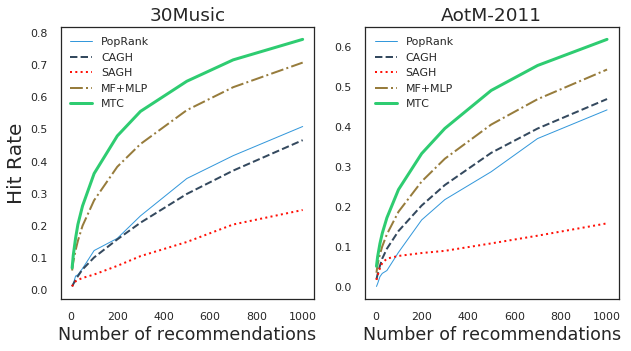

In [19]:
gen_curve('setting1', ('Hit-Rate', 'Hit Rate'), algos[:-1] + [('mf', 'MF+MLP'), ('mtc', 'MTC')], svgfile='hr1.svg')

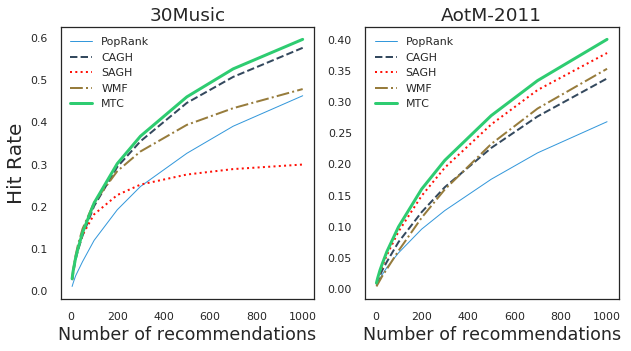

In [20]:
gen_curve('setting3', ('Hit-Rate', 'Hit Rate'), algos[:-1] + [('mf', 'WMF'), ('mtc', 'MTC')], svgfile='hr3.svg')

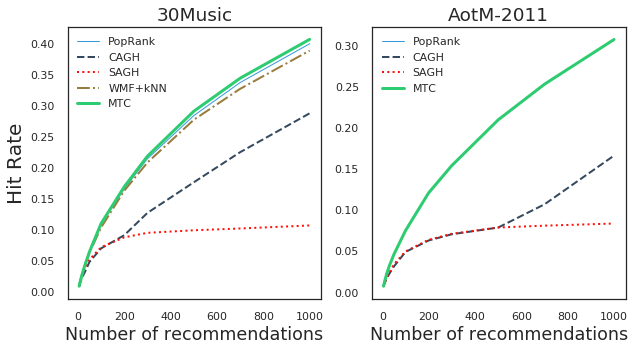

In [21]:
gen_curve('setting4', ('Hit-Rate', 'Hit Rate'), algos[:-1] + [('mf', 'WMF+kNN'), ('mtc', 'MTC')], svgfile='hr4.svg')

### Novelty

Moderate values are preferable

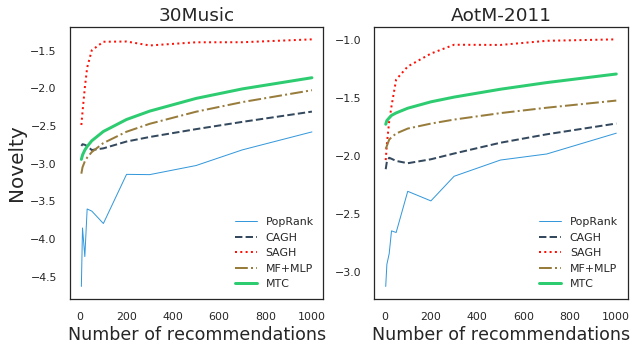

In [22]:
gen_curve('setting1', ('Novelty', 'Novelty'), algos[:-1] + [('mf', 'MF+MLP'), ('mtc', 'MTC')], svgfile='nov1.svg',
          legend_loc='lower right')

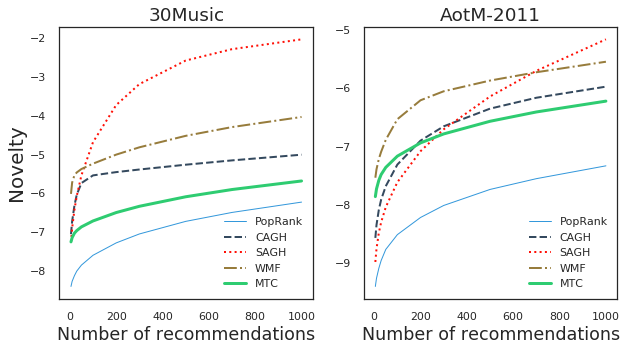

In [23]:
gen_curve('setting3', ('Novelty', 'Novelty'), algos[:-1] + [('mf', 'WMF'), ('mtc', 'MTC')], svgfile='nov3.svg',
          legend_loc='lower right')

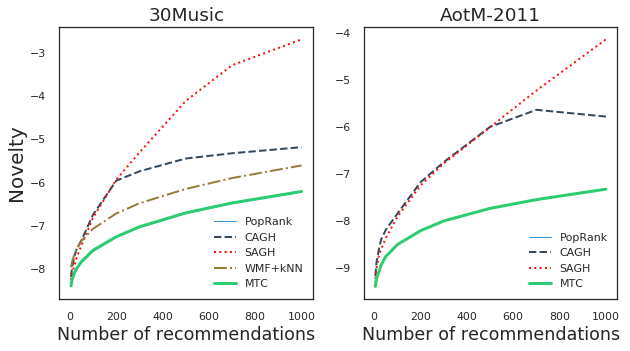

In [24]:
gen_curve('setting4', ('Novelty', 'Novelty'), algos[:-1] + [('mf', 'WMF+kNN'), ('mtc', 'MTC')], svgfile='nov4.svg',
          legend_loc='lower right')

### Artist diversity

In [ ]:
# gen_curve('setting1', ('Artist-Diversity', 'Artist Diversity'), algos[:-1] + [('mf', 'MF+MLP'), ('mtc', 'MTC')], 
#           svgfile='adiv1.svg', legend_loc='lower right', TOPs=TOPs[5:])

In [ ]:
# gen_curve('setting3', ('Artist-Diversity', 'Artist Diversity'), algos[:-1] + [('mf', 'WMF'), ('mtc', 'MTC')], 
#           svgfile='adiv3.svg', legend_loc='lower right', TOPs=TOPs[5:])

In [ ]:
# gen_curve('setting4', ('Artist-Diversity', 'Artist Diversity'), algos[:-1] + [('mf', 'WMF+kNN'), ('mtc', 'MTC')], 
#           svgfile='nov4.svg', legend_loc='lower right', TOPs=TOPs[5:])

### Genre diversity

In [ ]:
# gen_curve('setting1', ('Genre-Diversity', 'Genre-Diversity'), algos, legend_loc='best', TOPs=TOPs[4:])

In [ ]:
# gen_curve('setting3', ('Genre-Diversity', 'Genre-Diversity'), algos, legend_loc='best', TOPs=TOPs[4:])

In [ ]:
# gen_curve('setting4', ('Genre-Diversity', 'Genre-Diversity'), algos, legend_loc='best', TOPs=TOPs[4:])